<a href="https://nces.ed.gov/programs/digest/2013menu_tables.asp">The Department of Education Statistics</a> annually releases a data set containing the percentage of bachelor degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Dr. Randal Olson at the University of Pennsylvania Institute for Biomedical Informatics has cleaned the data set and made it available on his <a href="http://www.randalolson.com/2014/06/14/percentage-of-bachelors-degrees-conferred-to-women-by-major-1970-2012"> blog.</a> 

Randal compiled this data set to explore the gender disparity in STEM fields.

In this project we'll explore how we can communicate the nuanced narrative of gender gap using data visualization.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

#preview the first few rows
women_degrees.head()


,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [32]:
print(ax.spines)

OrderedDict([('left', <matplotlib.spines.Spine object at 0x11d461090>), ('right', <matplotlib.spines.Spine object at 0x11cc92e10>), ('bottom', <matplotlib.spines.Spine object at 0x11cc92410>), ('top', <matplotlib.spines.Spine object at 0x11cc92f90>)])


<h4>Setting spines</h4>
We see  that in matplotlib, ax.spines is a dictionary and when we create an Axes instance with ax.spines, four Spine objects are created.with keys 'left','right','bottom','top' which are used to access each spine.


<h4>Figure Setup - Displaying Multiple Plots per Figure</h4>
Let's generate line charts for four STEM degree categories on a grid to encourage comparison


From the graphic non-data ink - tick-marks and spines are removed. By keeping the x and y-axis tick labels but not the spines* or tick marks, we are using the simplest method to make the data visible and remove distractions . 


 The 2X2 matrix gets created once, and only the subplots or quadrants in that one big box gets added with each loop run

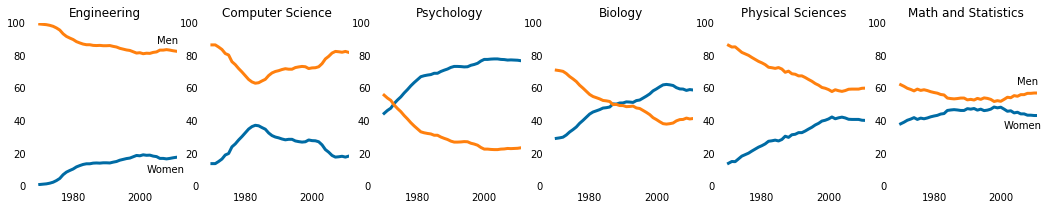

In [129]:
# six STEM degree categories, in desc order of gender gap.
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

#Set figure width 18 inches and height 3.
fig = plt.figure(figsize=(18, 3))

#make graph for specified list items
for sp in range(0,6):
    #Set subplot layout to 1 row by 6 columns - a single row with multiple columns
    #grid remains constant for fig variable but specify subplot position each time (sp+1)
    #1x6 grid, first subplot...2nd etc
    ax = fig.add_subplot(1,6,sp+1)
    
    # In this case default line weight appeared light
    # so to improve the data-ink ratio set to 3, so more chart area is used to showcase the data
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    # hide all the spines : 
    # iterate the dict using the view object returned by .items():
    #.items() returns the key-value pairs in the form of tuple; accessed via tuple unpacking
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        #place text at a particular x/y value
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

plt.show()

<h4>Comparing across all degree categories</h4>
All three of these lists are ordered in descending order by the percentage of degrees awarded to women. While stem_cats and other_cats have six degree categories as elements, lib_arts_cats only has five. 

Below modify the for loop from above is modified to generate the STEM line charts and also  two new for loops have been added to generate the line charts for liberal arts degrees and for other degrees.

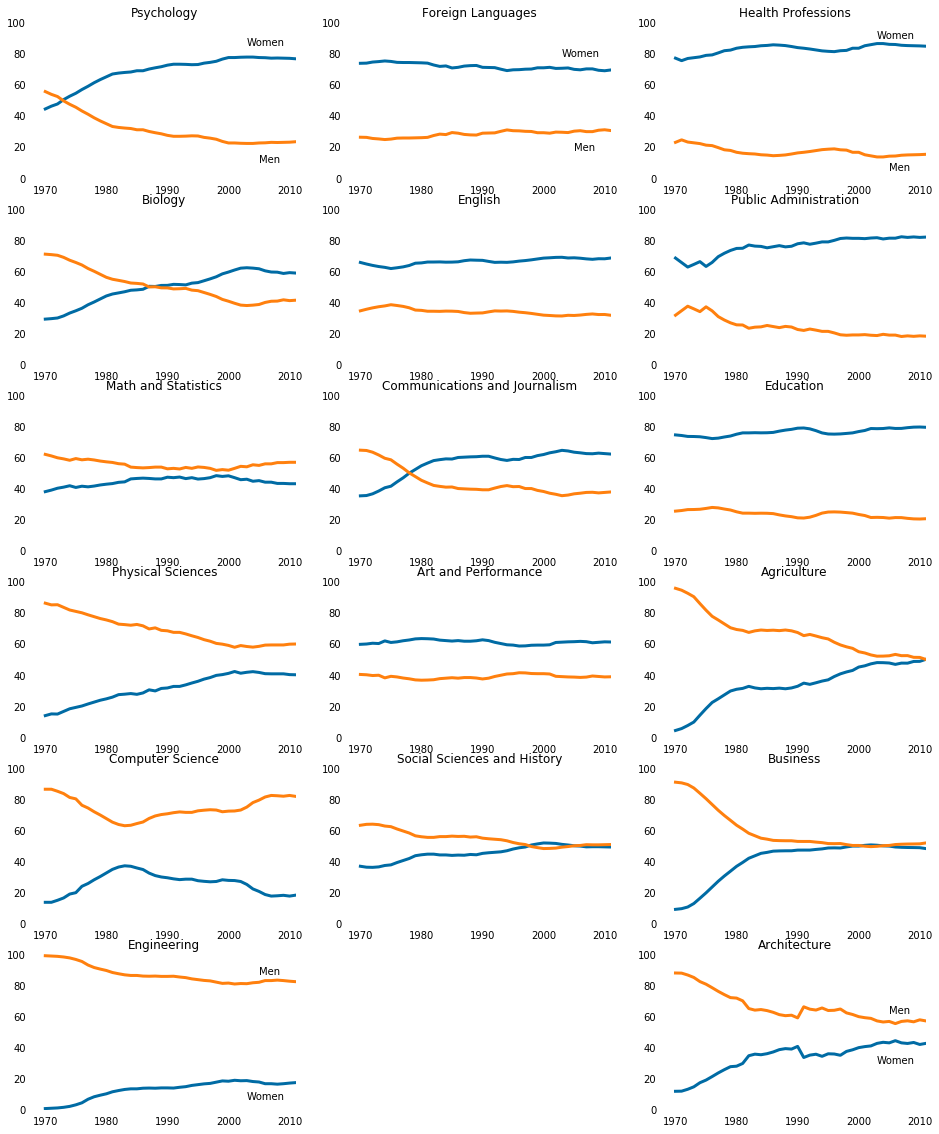

In [122]:

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']



fig = plt.figure(figsize=(16, 20))

    # Generate first column of line charts. STEM degrees. 
    #sp/3
    #sp 0,3,6,9,12,15
    #cat_index 0,1,2,3,4,5
for sp in range(0,18,3):
    cat_index = int(sp/3)
    
    #STEM category takes the value of 1, 4, 7, 10, 13, 16 as subplot reference
    #17 degrees that we need to generate line charts for, hence
    #subplot grid layout is 6 rows x 3 columns - fig.add_subplot(ROW,COLUMN,POSITION)
    ax = fig.add_subplot(6,3,sp+1)
    #accessing the element of stem_cats with cat_index variable
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]],
            c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]],
            c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')

   # Generate second column of line charts. Liberal arts degrees.
   #Liberal_Arts category takes the value 2, 5, 8, 11, 14, 17
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], 
            c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], 
            c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')

# Generate third column of line charts. Other degrees.
#Other Category takes the values 3, 6, 9, 12, 15, 18
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        
plt.show()

<h4>Hiding x-axis labels</h4><br>
Now we'll use Axes.tick_params() to remove the x-axis labels for every line chart in a column except for the bottom most one.

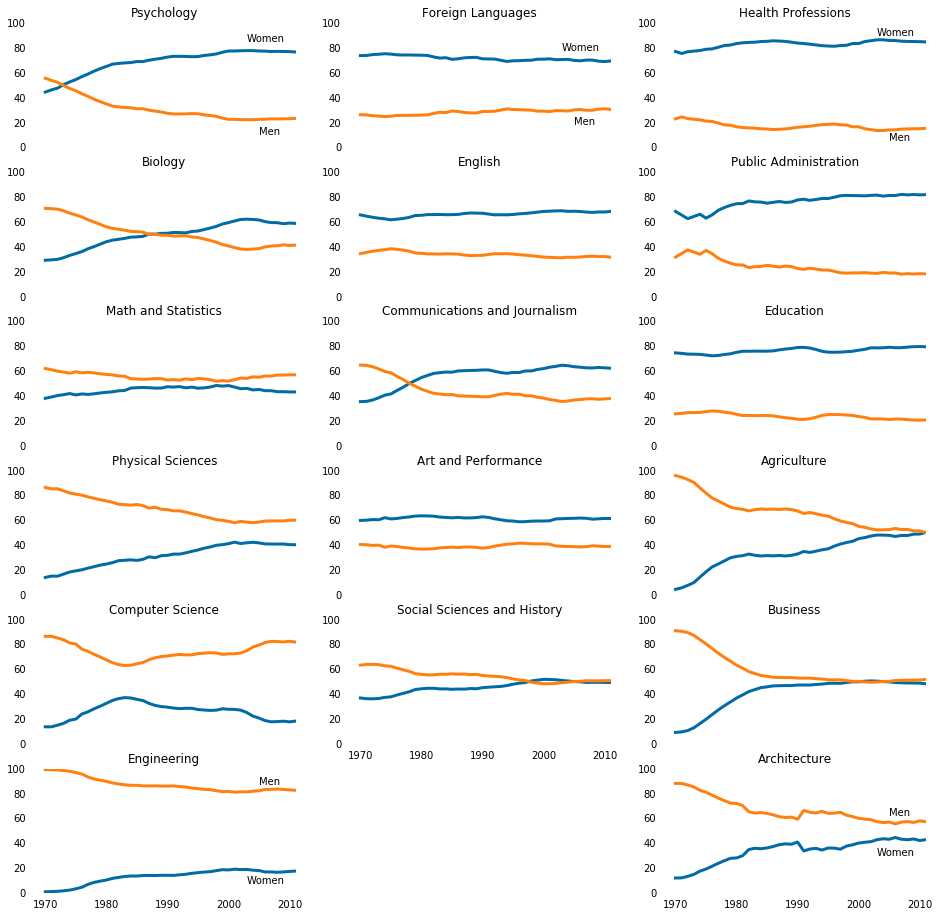

In [110]:
fig = plt.figure(figsize=(16, 16))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on')

## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

## Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.show()

<h4>Setting y-axis labels</h4>
<br>
Above we removed the x-axis labels for all but the bottommost plots to make them cleaner and more readable. 

Now we'll simplify the y-axis labels to further reduce visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis.

We use Axes.set_yticks() to only set the 0 and 100 labels to be displayed.

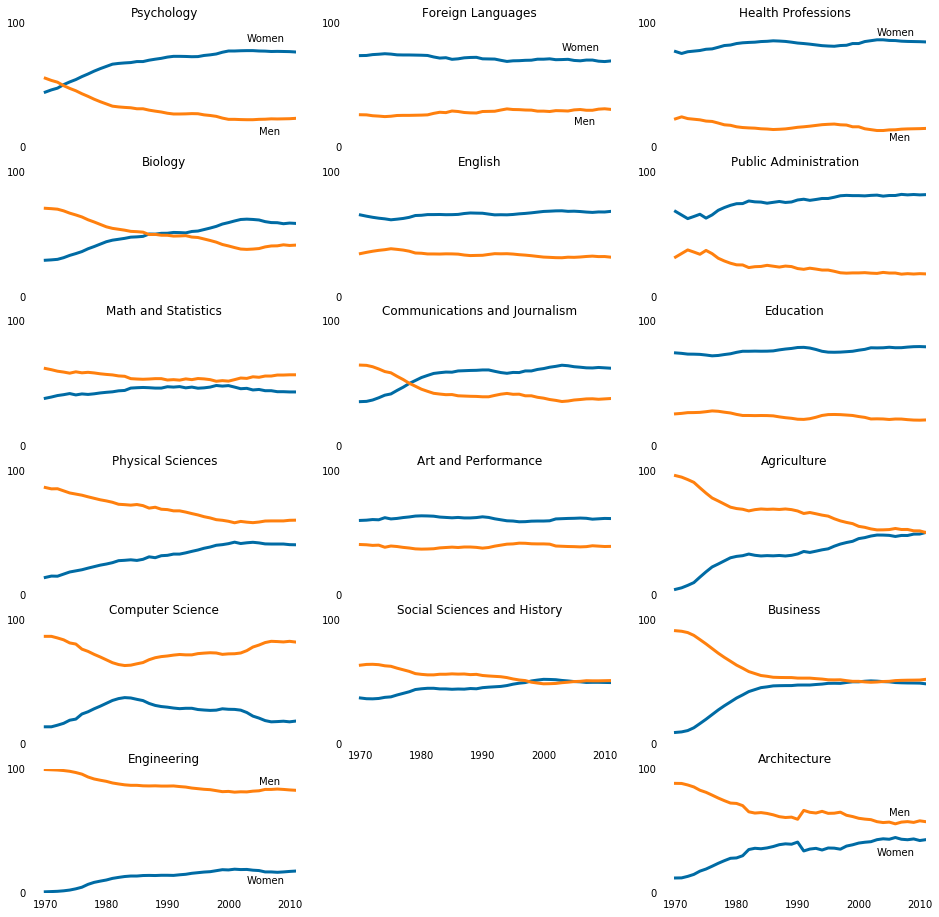

In [115]:
fig = plt.figure(figsize=(16, 16))

## Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    ax.set_yticks([0,100])
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on')

## Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    ax.set_yticks([0,100])
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

## Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    ax.set_yticks([0,100])
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.show()



Removing most of the y-axis labels reduced clutter, but also made it harder to understand which degrees have a near 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we'll do better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.

We'll use the Axes.axhline() function in axes module of the matplotlib library to add a horizontal line across the axis. The Axes Class contains most of the figure elements. We use the y param to set the y position in data coordinates of the horizontal line.

Its colour is set with the Color Blind 10 palette, and to reduce clutter the viewing its transparency is increased using the alpha parameter. The value passed in to the alpha parameter must range between 0 and 1.


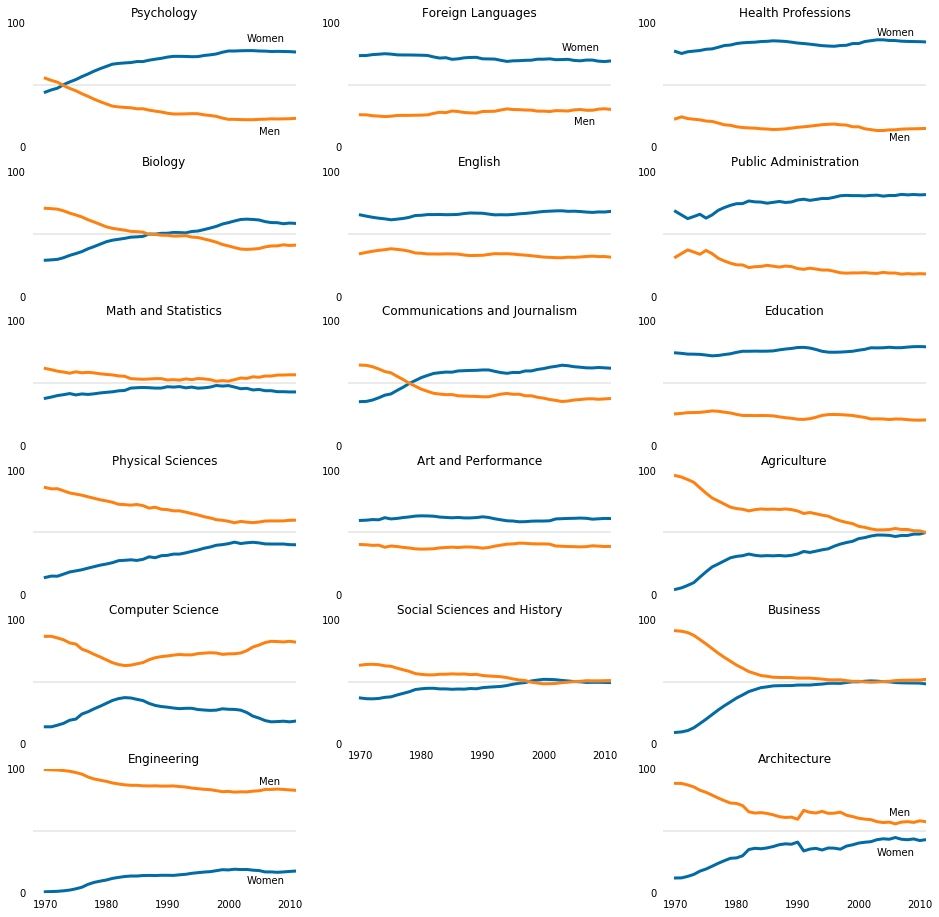

In [118]:
fig = plt.figure(figsize=(16, 16))

#Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    
    ax.set_yticks([0,100])
    #Set to the third color (light gray) in the Color Blind 10 palette
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on')

#Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

#Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')
        
plt.show()

In [134]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'


Now we'll use Figure.savefig() to export all of the plots contained in the figure as a single image file. Note that these have to be called before we display the figure using pyplot.show().Figure is the top level container for all plot elements. 

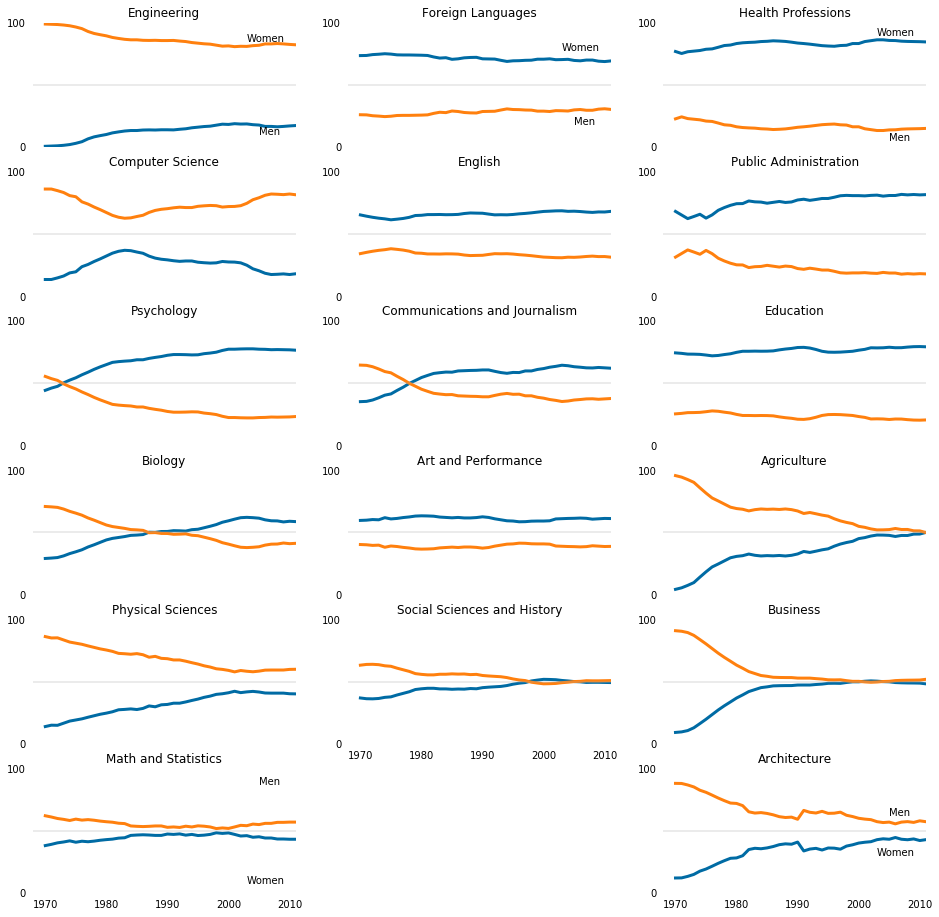

In [132]:
fig = plt.figure(figsize=(16, 16))

#Generate first column of line charts. STEM degrees.
for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    
    ax.set_yticks([0,100])
    #Set to the third color (light gray) in the Color Blind 10 palette
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 85, 'Women')
        ax.text(2005, 10, 'Men')
    elif cat_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on')

#Generate second column of line charts. Liberal arts degrees.
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')

#Generate third column of line charts. Other degrees.
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False)
    
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')
        
# fig.savefig('path/to/save/image/to.png')   \\---save the figure to file
# Export file before calling pyplot.show()
fig.savefig("degrees.png")
plt.show()

<h4>High Level Overview</h4>

In STEM the gender gap in engineering is large, but it has been gradually closing. In computer science it is large and getting larger. The gap in biology, physical sciences and math and statistics is small.In pyschology there was once more men but now it is opposite.
In liberal arts, out of the five degrees there are four with more women so 80%. 
In other degrees, there is a substantial gender gap in health professions, public administration and education with women being the majority and the gap is widening.
